In [1]:
import glob
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
from scipy.stats import pearsonr
import statistics

In [44]:
satellite_6_TP1=pd.read_csv("SatelliteImage_6bands_TP3.csv")
satellite_3_TP1=pd.read_csv("RGBvalues_satellite_TP3_afteroutliers.csv")
rgb_3_TP1=pd.read_csv("RGBuav_TP3.csv")

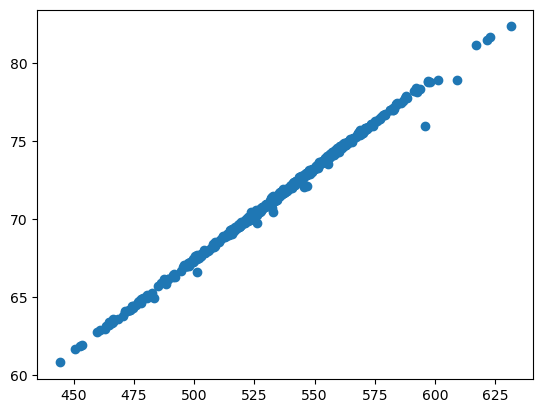

In [45]:
plt.scatter(satellite_6_TP1['Red_mean'], satellite_3_TP1['Red_mean'])

In [46]:
rgb_3_TP1['file_'] = rgb_3_TP1['file_'].str.replace('V2', '')

In [47]:
concatenated_df = pd.merge(satellite_6_TP1, satellite_3_TP1, on='file_', how='outer')
# concatenated_df.rename(columns={concatenated_df.columns[3]:"UAVVI"}, inplace=True)
# concatenated_df

In [48]:
concatenated_df = pd.merge(rgb_3_TP1,concatenated_df, on='file_', how='outer')

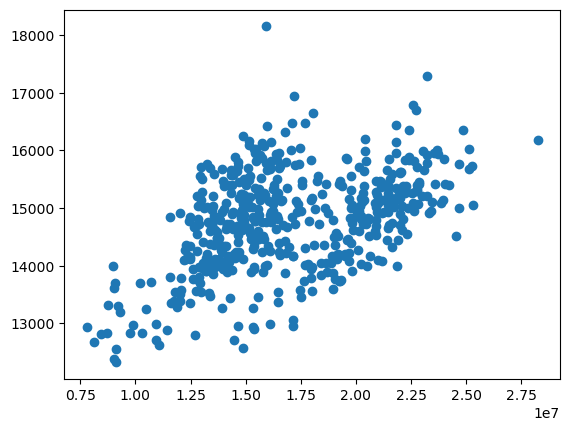

In [49]:
plt.scatter(concatenated_df['Red_sum'], concatenated_df['Red_sum_y'])

In [50]:
rgb_3_TP1

,file_,Red_mean,Red_median,Red_sum,Green_mean,Green_median,Green_sum,Blue_mean,Blue_median,Blue_sum,GLI_mean,GLI_median,GLI_sum,NGRDI_mean,NGRDI_median,NGRDI_sum
0,Crawfordsville-TP3-4351_10_13,62.460729,57.0,15605376,86.386066,84.0,21582954,55.557594,52.0,13880676,0.196923,0.200000,49199.820938,0.168207,0.178571,42025.243488
1,Crawfordsville-TP3-4351_10_14,44.417752,42.0,9129447,69.038859,66.0,14189971,41.436342,38.0,8516660,0.234108,0.234783,48117.715591,0.214851,0.220339,44159.638713
2,Crawfordsville-TP3-4351_10_15,64.692689,61.0,15455148,89.823236,89.0,21458861,60.561576,59.0,14468221,0.184090,0.187166,43979.319889,0.166424,0.177305,39758.915542
3,Crawfordsville-TP3-4351_10_16,56.660038,52.0,12425433,79.363245,76.0,17404201,52.982184,49.0,11618887,0.187678,0.188406,41157.463231,0.170050,0.178082,37291.606669
4,Crawfordsville-TP3-4351_10_17,60.425866,56.0,13000202,84.669443,82.0,18216038,55.239771,52.0,11884450,0.192360,0.190939,41384.988345,0.167544,0.173554,36045.843033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,Crawfordsville-TP3-4353_9_42,90.814168,87.0,22605826,117.918320,121.0,29352700,77.701210,78.0,19341696,0.173954,0.176471,43301.260971,0.135420,0.142857,33709.337663
518,Crawfordsville-TP3-4353_9_43,88.450918,87.0,22733655,116.704762,121.0,29995458,78.096568,80.0,20072380,0.171233,0.173913,44010.340867,0.137694,0.148148,35390.200732
519,Crawfordsville-TP3-4353_9_44,87.204023,86.0,22103342,115.235703,118.0,29208448,74.444957,75.0,18869340,0.180690,0.180077,45798.839371,0.139355,0.146789,35321.788870
520,Crawfordsville-TP3-4353_9_45,87.185396,86.0,22131664,116.683332,120.0,29619597,72.773386,72.0,18473233,0.193441,0.193825,49104.127102,0.144949,0.157088,36794.770990


In [51]:
concatenated_df.columns

Index(['file_', 'Red_mean', 'Red_median', 'Red_sum', 'Green_mean',
       'Green_median', 'Green_sum', 'Blue_mean', 'Blue_median', 'Blue_sum',
       'GLI_mean', 'GLI_median', 'GLI_sum', 'NGRDI_mean', 'NGRDI_median',
       'NGRDI_sum', 'Red_mean_x', 'Red_median_x', 'Red_sum_x', 'Green_mean_x',
       'Green_median_x', 'Green_sum_x', 'Blue_mean_x', 'Blue_median_x',
       'Blue_sum_x', 'GLI_mean_x', 'GLI_median_x', 'GLI_sum_x', 'NGRDI_mean_x',
       'NGRDI_median_x', 'NGRDI_sum_x', 'NDVI_mean', 'NDVI_median', 'NDVI_sum',
       'NDRE_mean', 'NDRE_median', 'NDRE_sum', 'RedEdge_mean',
       'RedEdge_median', 'RedEdge_sum', 'DeepBlue_mean', 'DeepBlue_median',
       'DeepBlue_sum', 'Red_mean_y', 'Red_median_y', 'Red_sum_y',
       'Green_mean_y', 'Green_median_y', 'Green_sum_y', 'Blue_mean_y',
       'Blue_median_y', 'Blue_sum_y', 'GLI_mean_y', 'GLI_median_y',
       'GLI_sum_y', 'NGRDI_mean_y', 'NGRDI_median_y', 'NGRDI_sum_y'],
      dtype='object')

In [18]:
concatenated_df=concatenated_df.loc[concatenated_df['Red_mean_x']<=500] 

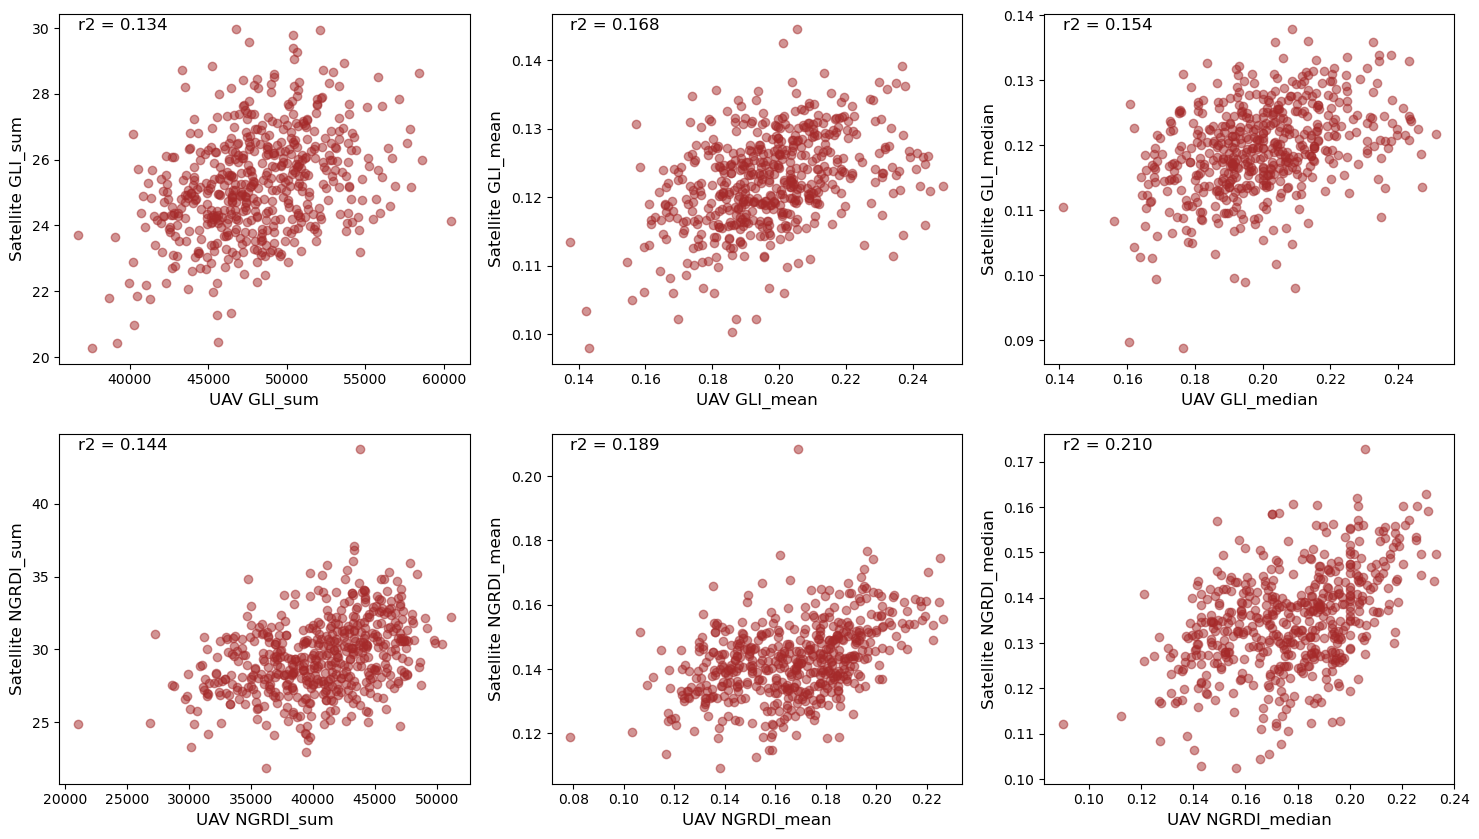

In [52]:
fig = plt.figure(figsize=(18,10))

#GLIsum
myax=fig.add_subplot(2,3,1)
myax.scatter(concatenated_df['GLI_sum'], concatenated_df['GLI_sum_x'], color='brown', alpha=0.5)
r, pval = pearsonr(concatenated_df['GLI_sum'].tolist(),concatenated_df['GLI_sum_x'].tolist())
r2 =r**2
myax.annotate("r2 = {:.3f}".format(r2), (min(concatenated_df['GLI_sum']), max(concatenated_df['GLI_sum_x'])), size=12)
myax.set_ylabel("Satellite GLI_sum",fontsize=12)
myax.set_xlabel("UAV GLI_sum", fontsize=12)

#GLIMean
myax=fig.add_subplot(2,3,2)
myax.scatter(concatenated_df['GLI_mean'], concatenated_df['GLI_mean_x'], color='brown', alpha=0.5)
r, pval = pearsonr(concatenated_df['GLI_mean'].tolist(),concatenated_df['GLI_mean_x'].tolist())
r2 =r**2
myax.annotate("r2 = {:.3f}".format(r2), (min(concatenated_df['GLI_mean']), max(concatenated_df['GLI_mean_x'])), size=12)
myax.set_ylabel("Satellite GLI_mean",fontsize=12)
myax.set_xlabel("UAV GLI_mean", fontsize=12)

#GLIMean
myax=fig.add_subplot(2,3,3)
myax.scatter(concatenated_df['GLI_median'], concatenated_df['GLI_median_x'], color='brown', alpha=0.5)
r, pval = pearsonr(concatenated_df['GLI_median'].tolist(),concatenated_df['GLI_median_x'].tolist())
r2 =r**2
myax.annotate("r2 = {:.3f}".format(r2), (min(concatenated_df['GLI_median']), max(concatenated_df['GLI_median_x'])), size=12)
myax.set_ylabel("Satellite GLI_median",fontsize=12)
myax.set_xlabel("UAV GLI_median", fontsize=12)

#GLIsum
myax=fig.add_subplot(2,3,4)
myax.scatter(concatenated_df['NGRDI_sum'], concatenated_df['NGRDI_sum_x'], color='brown', alpha=0.5)
r, pval = pearsonr(concatenated_df['NGRDI_sum'].tolist(),concatenated_df['NGRDI_sum_x'].tolist())
r2 =r**2
myax.annotate("r2 = {:.3f}".format(r2), (min(concatenated_df['NGRDI_sum']), max(concatenated_df['NGRDI_sum_x'])), size=12)
myax.set_ylabel("Satellite NGRDI_sum",fontsize=12)
myax.set_xlabel("UAV NGRDI_sum", fontsize=12)

#GLIMean
myax=fig.add_subplot(2,3,5)
myax.scatter(concatenated_df['NGRDI_mean'], concatenated_df['NGRDI_mean_x'], color='brown', alpha=0.5)
r, pval = pearsonr(concatenated_df['NGRDI_mean'].tolist(),concatenated_df['NGRDI_mean_x'].tolist())
r2 =r**2
myax.annotate("r2 = {:.3f}".format(r2), (min(concatenated_df['NGRDI_mean']), max(concatenated_df['NGRDI_mean_x'])), size=12)
myax.set_ylabel("Satellite NGRDI_mean",fontsize=12)
myax.set_xlabel("UAV NGRDI_mean", fontsize=12)

#GLIMean
myax=fig.add_subplot(2,3,6)
myax.scatter(concatenated_df['NGRDI_median'], concatenated_df['NGRDI_median_x'], color='brown', alpha=0.5)
r, pval = pearsonr(concatenated_df['NGRDI_median'].tolist(),concatenated_df['NGRDI_median_x'].tolist())
r2 =r**2
myax.annotate("r2 = {:.3f}".format(r2), (min(concatenated_df['NGRDI_median']), max(concatenated_df['NGRDI_median_x'])), size=12)
myax.set_ylabel("Satellite NGRDI_median",fontsize=12)
myax.set_xlabel("UAV NGRDI_median", fontsize=12)


plt.savefig("VIs_TP3.png")

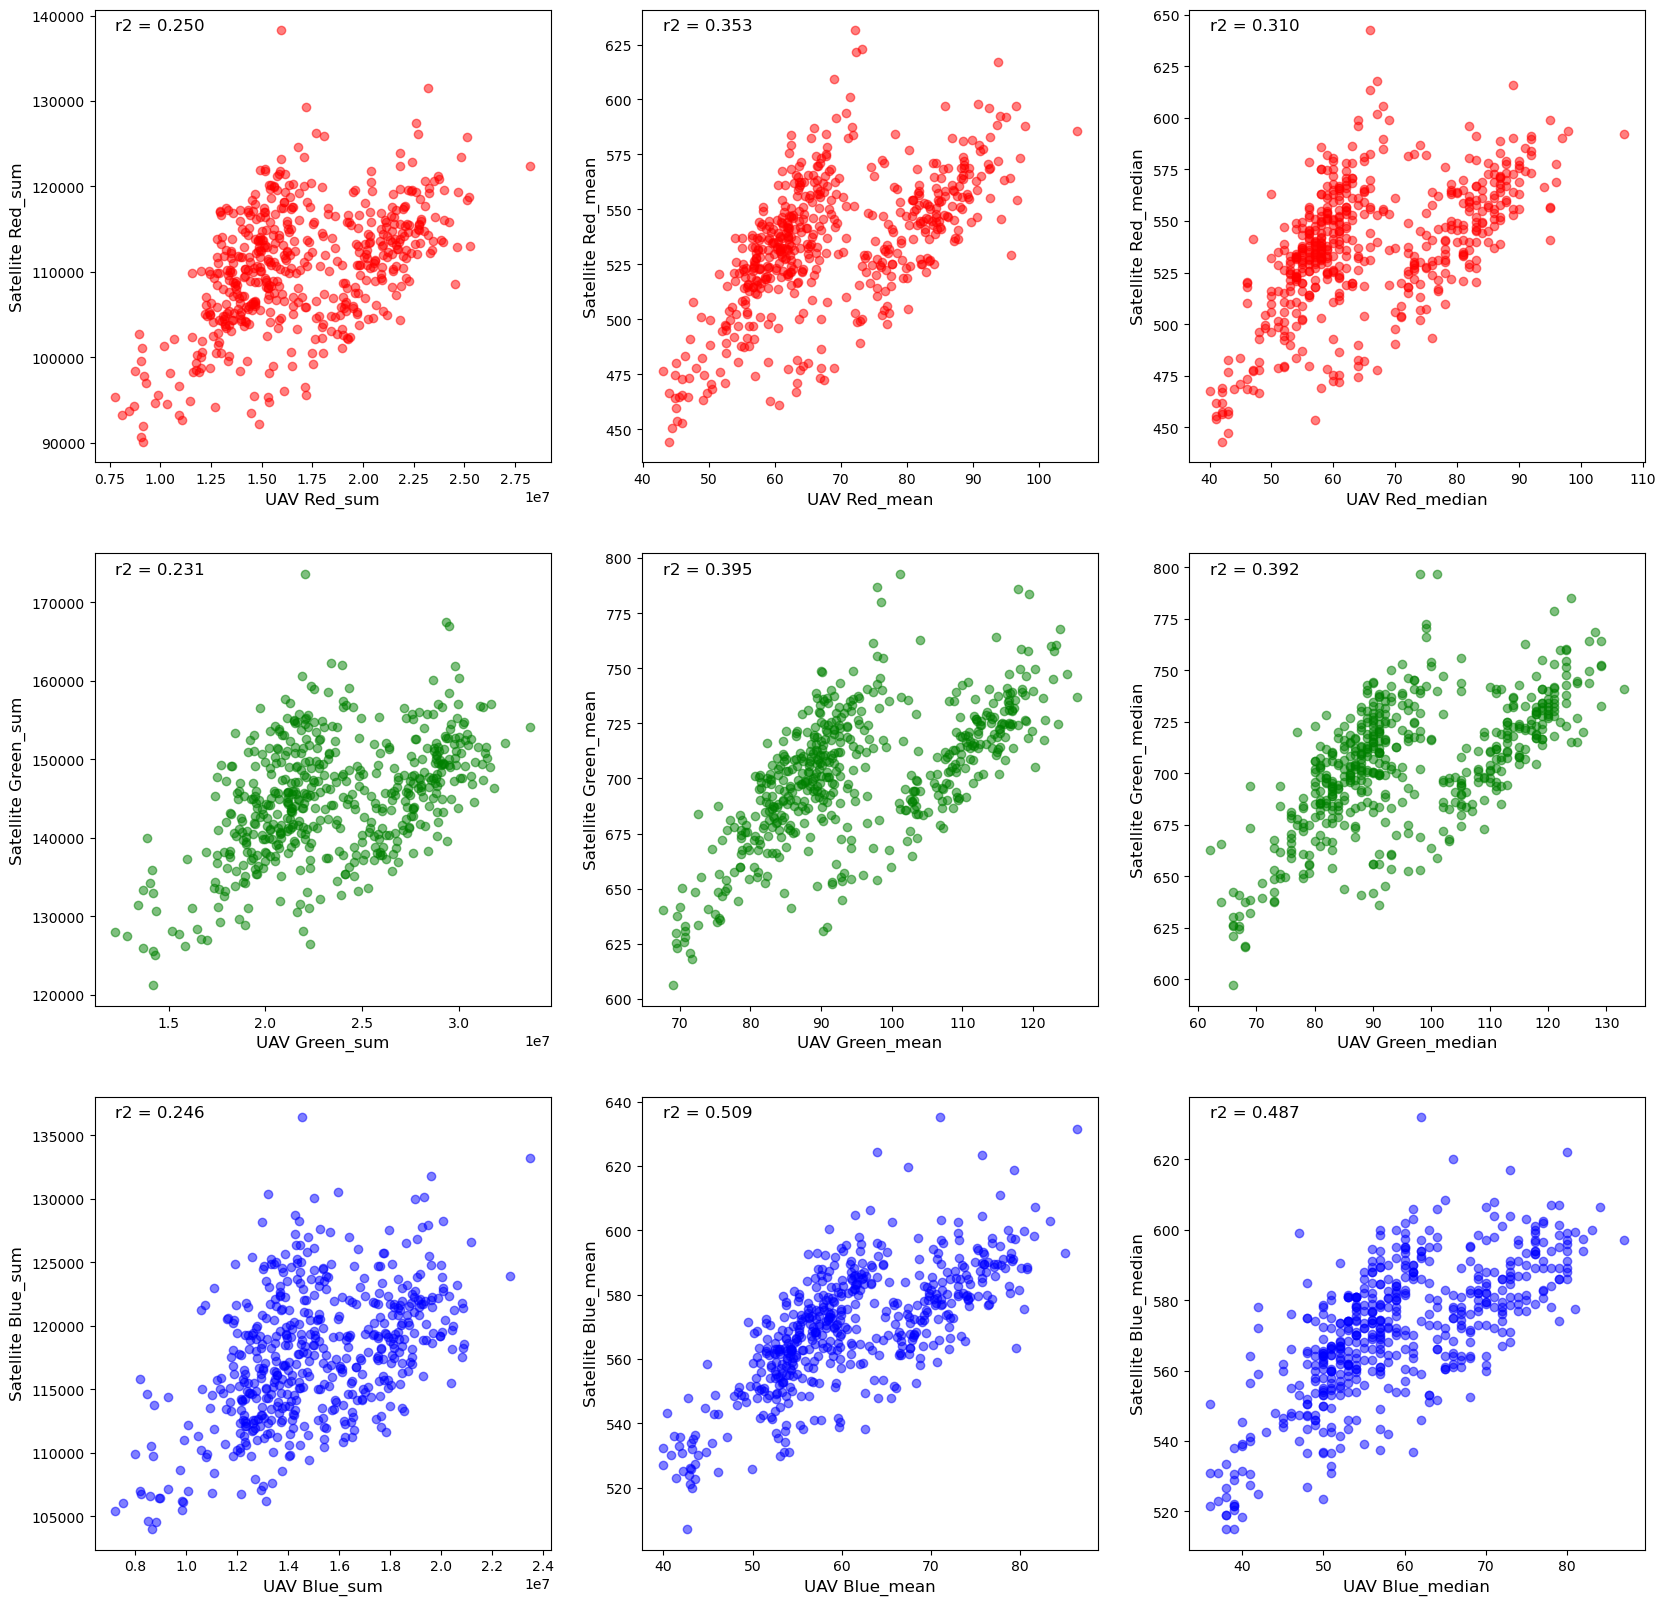

In [53]:
fig = plt.figure(figsize=(20,20))

#GLIsum
myax=fig.add_subplot(3,3,1)
myax.scatter(concatenated_df['Red_sum'], concatenated_df['Red_sum_x'], color='red', alpha=0.5)
r, pval = pearsonr(concatenated_df['Red_sum'].tolist(),concatenated_df['Red_sum_x'].tolist())
r2 =r**2
myax.annotate("r2 = {:.3f}".format(r2), (min(concatenated_df['Red_sum']), max(concatenated_df['Red_sum_x'])), size=12)
myax.set_ylabel("Satellite Red_sum",fontsize=12)
myax.set_xlabel("UAV Red_sum", fontsize=12)

#GLIMean
myax=fig.add_subplot(3,3,2)
myax.scatter(concatenated_df['Red_mean'], concatenated_df['Red_mean_x'], color='red', alpha=0.5)
r, pval = pearsonr(concatenated_df['Red_mean'].tolist(),concatenated_df['Red_mean_x'].tolist())
r2 =r**2
myax.annotate("r2 = {:.3f}".format(r2), (min(concatenated_df['Red_mean']), max(concatenated_df['Red_mean_x'])), size=12)
myax.set_ylabel("Satellite Red_mean",fontsize=12)
myax.set_xlabel("UAV Red_mean", fontsize=12)

#GLIMean
myax=fig.add_subplot(3,3,3)
myax.scatter(concatenated_df['Red_median'], concatenated_df['Red_median_x'], color='red', alpha=0.5)
r, pval = pearsonr(concatenated_df['Red_median'].tolist(),concatenated_df['Red_median_x'].tolist())
r2 =r**2
myax.annotate("r2 = {:.3f}".format(r2), (min(concatenated_df['Red_median']), max(concatenated_df['Red_median_x'])), size=12)
myax.set_ylabel("Satellite Red_median",fontsize=12)
myax.set_xlabel("UAV Red_median", fontsize=12)

#GLIsum
myax=fig.add_subplot(3,3,4)
myax.scatter(concatenated_df['Green_sum'], concatenated_df['Green_sum_x'], color='Green', alpha=0.5)
r, pval = pearsonr(concatenated_df['Green_sum'].tolist(),concatenated_df['Green_sum_x'].tolist())
r2 =r**2
myax.annotate("r2 = {:.3f}".format(r2), (min(concatenated_df['Green_sum']), max(concatenated_df['Green_sum_x'])), size=12)
myax.set_ylabel("Satellite Green_sum",fontsize=12)
myax.set_xlabel("UAV Green_sum", fontsize=12)

#GLIMean
myax=fig.add_subplot(3,3,5)
myax.scatter(concatenated_df['Green_mean'], concatenated_df['Green_mean_x'], color='Green', alpha=0.5)
r, pval = pearsonr(concatenated_df['Green_mean'].tolist(),concatenated_df['Green_mean_x'].tolist())
r2 =r**2
myax.annotate("r2 = {:.3f}".format(r2), (min(concatenated_df['Green_mean']), max(concatenated_df['Green_mean_x'])), size=12)
myax.set_ylabel("Satellite Green_mean",fontsize=12)
myax.set_xlabel("UAV Green_mean", fontsize=12)

#GLIMean
myax=fig.add_subplot(3,3,6)
myax.scatter(concatenated_df['Green_median'], concatenated_df['Green_median_x'], color='Green', alpha=0.5)
r, pval = pearsonr(concatenated_df['Green_median'].tolist(),concatenated_df['Green_median_x'].tolist())
r2 =r**2
myax.annotate("r2 = {:.3f}".format(r2), (min(concatenated_df['Green_median']), max(concatenated_df['Green_median_x'])), size=12)
myax.set_ylabel("Satellite Green_median",fontsize=12)
myax.set_xlabel("UAV Green_median", fontsize=12)


#GLIsum
myax=fig.add_subplot(3,3,7)
myax.scatter(concatenated_df['Blue_sum'], concatenated_df['Blue_sum_x'], color='Blue', alpha=0.5)
r, pval = pearsonr(concatenated_df['Blue_sum'].tolist(),concatenated_df['Blue_sum_x'].tolist())
r2 =r**2
myax.annotate("r2 = {:.3f}".format(r2), (min(concatenated_df['Blue_sum']), max(concatenated_df['Blue_sum_x'])), size=12)
myax.set_ylabel("Satellite Blue_sum",fontsize=12)
myax.set_xlabel("UAV Blue_sum", fontsize=12)

#GLIMean
myax=fig.add_subplot(3,3,8)
myax.scatter(concatenated_df['Blue_mean'], concatenated_df['Blue_mean_x'], color='Blue', alpha=0.5)
r, pval = pearsonr(concatenated_df['Blue_mean'].tolist(),concatenated_df['Blue_mean_x'].tolist())
r2 =r**2
myax.annotate("r2 = {:.3f}".format(r2), (min(concatenated_df['Blue_mean']), max(concatenated_df['Blue_mean_x'])), size=12)
myax.set_ylabel("Satellite Blue_mean",fontsize=12)
myax.set_xlabel("UAV Blue_mean", fontsize=12)

#GLIMean
myax=fig.add_subplot(3,3,9)
myax.scatter(concatenated_df['Blue_median'], concatenated_df['Blue_median_x'], color='Blue', alpha=0.5)
r, pval = pearsonr(concatenated_df['Blue_median'].tolist(),concatenated_df['Blue_median_x'].tolist())
r2 =r**2
myax.annotate("r2 = {:.3f}".format(r2), (min(concatenated_df['Blue_median']), max(concatenated_df['Blue_median_x'])), size=12)
myax.set_ylabel("Satellite Blue_median",fontsize=12)
myax.set_xlabel("UAV Blue_median", fontsize=12)


plt.savefig("ColorChannels_TP3.png")

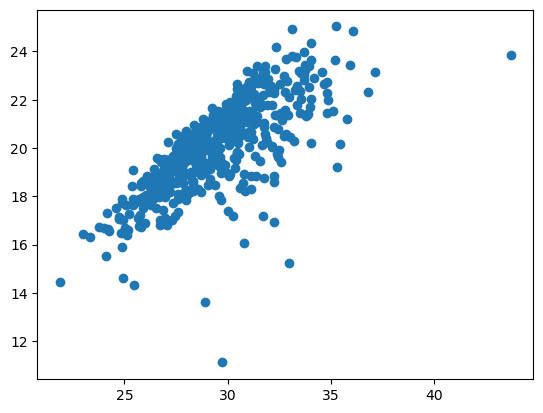

In [54]:
plt.scatter(concatenated_df['NGRDI_sum_x'], concatenated_df['NGRDI_sum_y'])

In [26]:
concatenated_df['NGRDI_sum']

0      45175.862361
1      49827.961739
2      34955.647285
3      43161.714439
4      43691.938958
           ...     
517    42186.140713
518    41790.941390
519    38073.196300
520    42627.165967
521    42555.838018
Name: NGRDI_sum, Length: 519, dtype: float64

In [11]:
rgb_3_TP1

,file_,Red_mean,Red_median,Red_sum,Green_mean,Green_median,Green_sum,Blue_mean,Blue_median,Blue_sum,GLI_mean,GLI_median,GLI_sum,NGRDI_mean,NGRDI_median,NGRDI_sum
0,Crawfordsville-TP1-4351_10_13,90.953899,89.0,19948100,136.731220,140.0,29988028,85.966524,82.0,18854264,0.229436,0.228571,50320.158603,0.205981,0.209877,45175.862361
1,Crawfordsville-TP1-4351_10_14,75.840986,71.0,16416464,119.937074,119.0,25961459,73.598977,68.0,15931161,0.245937,0.252900,53235.283771,0.230196,0.240000,49827.961739
2,Crawfordsville-TP1-4351_10_15,104.293481,106.0,24860750,140.526154,147.0,33497641,94.068028,94.0,22423278,0.179925,0.175325,42889.368357,0.146643,0.149485,34955.647285
3,Crawfordsville-TP1-4351_10_16,88.796322,87.0,20181184,130.104437,133.0,29569486,82.442006,80.0,18737007,0.216942,0.216667,49305.574583,0.189910,0.194690,43161.714439
4,Crawfordsville-TP1-4351_10_17,85.061262,82.0,18897125,126.374317,127.0,28075192,77.742873,73.0,17271279,0.227862,0.233449,50621.649910,0.196670,0.208633,43691.938958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,Crawfordsville-TP1-4353_9_42,105.721217,108.0,22566828,156.233275,167.0,33348930,99.089794,99.0,21151311,0.222046,0.220690,47396.976247,0.197634,0.202247,42186.140713
518,Crawfordsville-TP1-4353_9_43,98.715803,98.0,21893783,143.503174,150.0,31826995,94.301822,92.0,20914824,0.209354,0.207273,46431.889108,0.188429,0.192308,41790.941390
519,Crawfordsville-TP1-4353_9_44,113.226704,116.0,26004777,157.012457,168.0,36061051,100.945439,103.0,23184139,0.200972,0.195079,46157.237363,0.165773,0.166667,38073.196300
520,Crawfordsville-TP1-4353_9_45,101.245747,102.0,22395053,148.228210,156.0,32787339,89.727824,88.0,19847346,0.232182,0.226766,51357.578788,0.192713,0.195652,42627.165967
